In [215]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder

In [216]:
df = pd.read_excel('/home/anhtupham99/NBA-analytics/Vexere - Junior Data Analyst - Dataset  (1).xlsx', sheet_name='Data', engine='openpyxl')
df

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,departure_date,departure_time,arrival_date,arrival_time,from_to_location,from_to,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount
0,20205,31268,Xs1fLinPQun+Oy/mD0FlfXMyJD38YlXJfXNbz+qO+5U=,Female,40.0,IOS,Paid,2023-03-01,2023-03-14,17:55:00,2023-03-14,18:55:00,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,I1_ECO,867760,0,0.0,45000
1,20190,31242,m/auVlEoaGSe2MqR/Lq4CFXJnI8zauNyF/KiFmMgXHs=,Female,40.0,GYL,Paid,2023-03-01,2023-03-02,09:30:00,2023-03-02,10:30:00,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,Z1_ECO,974280,0,0.0,45000
2,20245,31337,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,48.0,IOS,Paid,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1423080,0,0.0,16000
3,20259,31360,WiK2P31WEd4mckRNVWz0C2aKKRgSrauAG8NdfTLnKjE=,Male,29.0,Android,New,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0.0,45000
4,20255,31355,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,42.0,IOS,Paid,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0.0,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,33900,52696,8NMW+DtI8tKi5qcf2nZvqHJUhvC5Ic4063AvCJXGIys=,Male,58.0,GYL,Paid,2023-05-31,2023-06-02,07:55:00,2023-06-02,09:35:00,DLI - SGN,Lâm Đồng - Hồ Chí Minh,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,807400,0,0.0,0
19092,33907,52705,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,29.0,Android,Cancel,2023-05-31,2023-06-10,07:55:00,2023-06-10,09:35:00,DLI - SGN,Lâm Đồng - Hồ Chí Minh,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,E,910000,158400,0.0,0
19093,33854,52630,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,29.0,GYL,New,2023-05-31,2023-06-15,07:55:00,2023-06-15,09:35:00,DLI - SGN,Lâm Đồng - Hồ Chí Minh,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,534400,0,0.0,0
19094,33882,52668,qUmeTJy0TEYBaZ6h6A+DRzmuD2SfdhcGxwsYUDGRpc8=,Female,25.0,Android,Cancel,2023-05-31,2023-06-02,15:30:00,2023-06-02,16:25:00,DLI - SGN,Lâm Đồng - Hồ Chí Minh,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,T,1109900,0,0.0,0


In [217]:
df.describe()

,order_id,ticket_id,passenger_age,created_date,departure_date,arrival_date,ticket_price,baggage,insurance_fee,discount_amount
count,19096.000000,19096.000000,19091.00000,19096,19096,19096,1.909600e+04,19096.000000,19096.000000,19096.000000
mean,26922.722350,41841.328184,82.64093,2023-04-14 08:03:35.668203008,2023-04-27 12:25:42.857142784,2023-04-27 13:28:18.198575616,1.044121e+06,20216.394533,98.973508,24360.860913
min,20142.000000,31164.000000,-1.00000,2023-03-01 00:00:00,2023-03-01 00:00:00,2023-03-01 00:00:00,3.000000e+03,-90000.000000,-60000.000000,-24000.000000
25%,23431.750000,36484.750000,22.00000,2023-03-28 00:00:00,2023-04-08 00:00:00,2023-04-08 00:00:00,7.375200e+05,0.000000,0.000000,0.000000
50%,26826.000000,41807.500000,28.00000,2023-04-13 00:00:00,2023-04-28 00:00:00,2023-04-28 00:00:00,9.568000e+05,0.000000,0.000000,20000.000000
75%,30361.250000,47093.250000,36.00000,2023-05-03 00:00:00,2023-05-15 00:00:00,2023-05-15 00:00:00,1.255100e+06,0.000000,0.000000,45000.000000
max,33943.000000,52769.000000,999999.00000,2023-05-31 00:00:00,2024-01-26 00:00:00,2024-01-26 00:00:00,9.010800e+06,831600.000000,60000.000000,60000.000000
std,3999.995801,6199.505890,7237.23873,NaN,NaN,NaN,4.689676e+05,66560.500630,2289.735286,21824.077389


In [218]:
df.nunique()

order_id              12422
ticket_id             19096
passenger_id           5282
passenger_gender          2
passenger_age            92
ticket_source_name        3
ticket_status             3
created_date             92
departure_date          188
departure_time          234
arrival_date            188
arrival_time            243
from_to_location        119
from_to                 115
airline                   4
seat_class               69
ticket_price           2357
baggage                  63
insurance_fee             9
discount_amount          13
dtype: int64

In [219]:
df.isnull().sum()

order_id                0
ticket_id               0
passenger_id            0
passenger_gender       13
passenger_age           5
ticket_source_name      0
ticket_status           0
created_date            0
departure_date          0
departure_time          0
arrival_date            0
arrival_time            0
from_to_location        0
from_to                 0
airline                 0
seat_class            120
ticket_price            0
baggage                 0
insurance_fee           0
discount_amount         0
dtype: int64

In [220]:
# Will keep all the nulls because we don't want to lose data on revenue

# Replace passenger_gender nulls with 'unknown'
df['passenger_gender'].fillna('unknown', inplace=True)

# Replace passenger_age nulls with -1 as we want to keep passenger_age as a numeric row
df['passenger_age'].fillna(-1, inplace=True)

# Replace seat_class nulls with 'unknown'
df['seat_class'].fillna('unknown', inplace=True)

In [221]:
df.dtypes

order_id                       int64
ticket_id                      int64
passenger_id                  object
passenger_gender              object
passenger_age                float64
ticket_source_name            object
ticket_status                 object
created_date          datetime64[ns]
departure_date        datetime64[ns]
departure_time                object
arrival_date          datetime64[ns]
arrival_time                  object
from_to_location              object
from_to                       object
airline                       object
seat_class                    object
ticket_price                   int64
baggage                        int64
insurance_fee                float64
discount_amount                int64
dtype: object

In [222]:
# Convert order_id, ticket_id to string since they are not supposed to be numeric
df['order_id'] = df['order_id'].astype(str)
df['ticket_id'] = df['ticket_id'].astype(str)

# Datetime data is useful for seasonality analysis
df['departure_datetime'] = pd.to_datetime(df['departure_date'].astype(str) + ' ' + df['departure_time'].astype(str), errors='coerce')
df['arrival_datetime'] = pd.to_datetime(df['arrival_date'].astype(str) + ' ' + df['arrival_time'].astype(str), errors='coerce')

# Drop the original columns
df.drop(['departure_date', 'departure_time', 'arrival_date', 'arrival_time'], axis=1, inplace=True)

# Split from_to_locatiton into FROM and TO for better analysis
df[['from_airport', 'to_airport']] = df['from_to_location'].str.split(' - ', expand=True)
df[['from_city', 'to_city']] = df['from_to'].str.split(' - ', expand=True)
df.drop(['from_to_location', 'from_to'], axis=1, inplace=True)

In [223]:
df.columns

Index(['order_id', 'ticket_id', 'passenger_id', 'passenger_gender',
       'passenger_age', 'ticket_source_name', 'ticket_status', 'created_date',
       'airline', 'seat_class', 'ticket_price', 'baggage', 'insurance_fee',
       'discount_amount', 'departure_datetime', 'arrival_datetime',
       'from_airport', 'to_airport', 'from_city', 'to_city'],
      dtype='object')

In [224]:
df.isnull().sum()

order_id              0
ticket_id             0
passenger_id          0
passenger_gender      0
passenger_age         0
ticket_source_name    0
ticket_status         0
created_date          0
airline               0
seat_class            0
ticket_price          0
baggage               0
insurance_fee         0
discount_amount       0
departure_datetime    0
arrival_datetime      0
from_airport          0
to_airport            0
from_city             0
to_city               0
dtype: int64

In [225]:
df.duplicated().sum()

0

# Abnormal Data

In [226]:
df.describe()

,passenger_age,created_date,ticket_price,baggage,insurance_fee,discount_amount,departure_datetime,arrival_datetime
count,19096.000000,19096,1.909600e+04,19096.000000,19096.000000,19096.000000,19096,19096
mean,82.619030,2023-04-14 08:03:35.668203008,1.044121e+06,20216.394533,98.973508,24360.860913,2023-04-28 02:28:53.593422848,2023-04-28 03:58:44.861751296
min,-1.000000,2023-03-01 00:00:00,3.000000e+03,-90000.000000,-60000.000000,-24000.000000,2023-03-01 19:40:00,2023-03-01 21:50:00
25%,22.000000,2023-03-28 00:00:00,7.375200e+05,0.000000,0.000000,0.000000,2023-04-08 09:45:00,2023-04-08 11:15:00
50%,28.000000,2023-04-13 00:00:00,9.568000e+05,0.000000,0.000000,20000.000000,2023-04-28 06:55:00,2023-04-28 08:20:00
75%,36.000000,2023-05-03 00:00:00,1.255100e+06,0.000000,0.000000,45000.000000,2023-05-15 08:37:30,2023-05-15 09:55:00
max,999999.000000,2023-05-31 00:00:00,9.010800e+06,831600.000000,60000.000000,60000.000000,2024-01-26 16:45:00,2024-01-26 18:35:00
std,7236.291264,NaN,4.689676e+05,66560.500630,2289.735286,21824.077389,NaN,NaN


##### From the describe table, we may notice something odd about the ticket price. Its MIN value is 3e03 = 3000, which doesn't make much sense. Let's go see what that might be

In [227]:
df.sort_values(by='ticket_price', ascending=True).head(25)

# Based on the data, we can see that most of the oddly priced tickets are for kids under 2 years old. According to the internet, some airlines charge 10%
# - 20% of the adult ticket for kids under 2. However, 10% of 3000 is 300k VND, which may or may not be an explainable price, so we look further:

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount,departure_datetime,arrival_datetime,from_airport,to_airport,from_city,to_city
15588,31357,48614,w7dysjySz2AEVexD8ej2kshB5GninEEJW3bk0gIx4GE=,Female,1.0,GYL,Paid,2023-05-10,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,3000,0,0.0,0,2023-05-11 08:00:00,2023-05-11 08:55:00,DLI,SGN,Lâm Đồng,Hồ Chí Minh
7412,25267,39366,jDVnORYh54WuzYVYVQy8xN075RyMvARv68aooFkMsLk=,Male,2.0,IOS,New,2023-04-06,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,3300,0,0.0,0,2023-04-09 17:50:00,2023-04-09 19:40:00,SGN,CXR,Hồ Chí Minh,Khánh Hòa
14936,30749,47695,KYU7PptLqE5/u+ELphzH1ugjPf4THAP8++arm90VL0k=,Male,1.0,Android,New,2023-05-06,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,3300,0,0.0,0,2023-05-07 06:30:00,2023-05-07 07:20:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng
14757,30611,47490,kmt6UIO9rRvmHFARIhR0WCGnll821dY87WM1rJMrZAQ=,Female,2.0,Android,New,2023-05-05,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,3300,0,0.0,0,2023-05-09 07:40:00,2023-05-09 08:50:00,SGN,PXU,Hồ Chí Minh,Gia Lai
7710,25439,39632,tlpTXIEljiXSXPbafJg4SGoL8BY4+3JoiCSXxZlqr4w=,Female,0.0,IOS,New,2023-04-07,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,3600,0,0.0,0,2023-04-10 20:00:00,2023-04-10 21:05:00,SGN,CXR,Hồ Chí Minh,Khánh Hòa
5455,23993,37348,hbkZiAgdku4wztubIZ0Os3nZF8t5DmTPiHQzWj0nsfg=,Female,1.0,Android,Paid,2023-03-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,11700,0,0.0,0,2023-04-04 11:30:00,2023-04-04 12:50:00,SGN,VCL,Hồ Chí Minh,Quảng Nam
2307,21733,33709,hpCMMfdcZbRPsW0KeLsxtk/ZKzh2yiNP4AXRpSOaYU0=,Female,2.0,IOS,New,2023-03-14,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,P,13500,0,0.0,0,2023-03-22 15:20:00,2023-03-22 16:10:00,SGN,BMV,Hồ Chí Minh,Đắk Lắk
14768,30602,47478,85Z2eSXWnOFz1gu9t8hh6QO0o0puatcycs5/B0z4/Hs=,Female,1.0,IOS,New,2023-05-05,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,13600,0,0.0,0,2023-05-12 09:15:00,2023-05-12 10:40:00,TBB,SGN,Phú Yên,Hồ Chí Minh
14959,30712,47646,85Z2eSXWnOFz1gu9t8hh6QO0o0puatcycs5/B0z4/Hs=,Female,1.0,IOS,Paid,2023-05-06,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,13600,0,0.0,0,2023-05-12 09:15:00,2023-05-12 10:40:00,TBB,SGN,Phú Yên,Hồ Chí Minh
5459,23987,37336,hbkZiAgdku4wztubIZ0Os3nZF8t5DmTPiHQzWj0nsfg=,Female,1.0,Android,New,2023-03-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,15600,0,0.0,0,2023-04-04 11:30:00,2023-04-04 12:50:00,SGN,VCL,Hồ Chí Minh,Quảng Nam


In [228]:
df[df['order_id'] == '32300']

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount,departure_datetime,arrival_datetime,from_airport,to_airport,from_city,to_city
16850,32300,50106,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,2.0,IOS,New,2023-05-17,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,24300,0,0.0,0,2023-05-24 06:15:00,2023-05-24 07:15:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng
16852,32300,50105,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,2.0,IOS,New,2023-05-17,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,24300,0,0.0,0,2023-05-24 06:15:00,2023-05-24 07:15:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng
16854,32300,50101,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,29.0,IOS,New,2023-05-17,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,999600,160000,0.0,0,2023-05-24 06:15:00,2023-05-24 07:15:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng
16859,32300,50103,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Male,12.0,IOS,New,2023-05-17,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,897600,0,0.0,0,2023-05-24 06:15:00,2023-05-24 07:15:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng
16861,32300,50102,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Male,29.0,IOS,New,2023-05-17,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,833000,180000,0.0,0,2023-05-24 06:15:00,2023-05-24 07:15:00,SGN,DLI,Hồ Chí Minh,Lâm Đồng


##### Based on the data, it's hard to conclude the actual rate an airline applies on infants and children. This can be worked out with another department to clarify. But we can safely assume that it should not be an outlier or abnormal data since there's a pattern to it

##### Secondly, baggage - insurance fee - discount have min negative values, which we are unsure why

In [229]:
df.sort_values(by='baggage', ascending=True).head()

# We can see that 2 tickets have negative baggage values. It's likely due to system errors, or maybe they received credits
# of some sorts but we don't have evidence for that. So we may convert them to positive values for now. In practice we should reconfirm with
# other departments to see if this is a system error or not.

df['baggage'] = df['baggage'].abs()

In [230]:
df.sort_values(by='insurance_fee', ascending=True).head()

# We can see that 1 tickets have negative insurance values, and 2 that are very odd values. It's likely due to system errors,
# or a specifc measure/credit gift of some sorts we don't have evidence on. So we may convert them to positive values, and turn the odd
# values to 0 for now. In practice we should reconfirm with other departments to see if this is a system error or not.
df['insurance_fee'] = df['insurance_fee'].abs()
df['insurance_fee'] = df['insurance_fee'].apply(lambda x: 0 if x < 10000 else x)


In [231]:
df['insurance_fee'].unique()

array([    0., 40000., 50000., 45000., 60000., 55000.])

In [232]:
df.sort_values(by='discount_amount', ascending=True).head()

# Discount, as we see its general patterm, does not consist of negative values. System errors are very likely here, so we convert them to positive

df['discount_amount'] = df['discount_amount'].abs()

In [233]:
# We can see there's very high mean of age for the passengers

df.sort_values(by='passenger_age', ascending=False).head()

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount,departure_datetime,arrival_datetime,from_airport,to_airport,from_city,to_city
10745,27634,42990,u6wiLdxkhXrxNFDbci6M669nTMai/mXkOP8M/SBUUMk=,Male,999999.0,Android,New,2023-04-17,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,H1_ECO,1486440,0,0.0,60000,2023-04-17 21:10:00,2023-04-17 22:15:00,CXR,SGN,Khánh Hòa,Hồ Chí Minh
2329,21659,33598,gjcn/MxeUG+xY03kBIqrpuHrKcB9KEU8mwFpdZJflKE=,Male,115.0,IOS,New,2023-03-14,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,E,1303200,0,0.0,0,2023-03-16 12:15:00,2023-03-16 13:25:00,CXR,SGN,Khánh Hòa,Hồ Chí Minh
7046,25079,39058,sTvbcUABdjcHeb3+vLPDHWPL9Z6eE8UGbLJrWy4L5Ag=,Female,91.0,Android,Paid,2023-04-05,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,E1_ECO,625600,0,0.0,0,2023-04-19 09:40:00,2023-04-19 11:40:00,PXU,HAN,Gia Lai,Hà Nội
4298,23096,35956,rVt08jWYMkxocPKnbs6vxEJtvBMpRc+95YXxo6h5wLs=,Female,91.0,IOS,Paid,2023-03-26,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1265310,0,0.0,24000,2023-04-11 16:00:00,2023-04-11 17:35:00,HAN,PXU,Hà Nội,Gia Lai
6831,25079,39057,sTvbcUABdjcHeb3+vLPDHWPL9Z6eE8UGbLJrWy4L5Ag=,Female,91.0,Android,Paid,2023-04-05,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,E1_ECO,962400,0,0.0,45000,2023-04-11 16:00:00,2023-04-11 17:35:00,HAN,PXU,Hà Nội,Gia Lai


In [245]:
# Since it's hard to say what's the actual age of the 2 passengers with age error, we will convert them to -1 for now insteal of dropping them to keep the 
# revenue data as accurate as possible.
df['passenger_age'] = df['passenger_age'].apply(lambda x: -1 if x > 100 else x)

In [247]:
df['passenger_age'].mean()
# This makes a lot more sense

30.245967741935484

##### In real-word scenario the above logics must be confirmed with someone who knows about the services and policies of these airlines before making the decision

## Analysis Time

### 1. How are the seat options generating revenue? How revenue can be improved by look at seat_class?

In [235]:
# We first process the data to make it more readable

df['seat_class_simplified'] = np.select(
    [
        df['seat_class'].str.contains('_DLX', case=False, na=False),
        df['seat_class'].str.contains('_ECO', case=False, na=False),
        df['seat_class'].str.contains('_SBOSS', case=False, na=False),
        df['seat_class'].str.contains('BusinessFlex', case=False, na=False),
        df['seat_class'].str.contains('BusinessSmart', case=False, na=False),
        df['seat_class'].str.contains('EconomyFlex', case=False, na=False),
        df['seat_class'].str.contains('EconomySaver', case=False, na=False),
        df['seat_class'].str.contains('EconomySmart', case=False, na=False),
        df['seat_class'].str.contains('EconomySaverMax', case=False, na=False),
    ],
    [
        'Deluxe',
        'Economy',
        'SkyBoss',
        'Business Flex',
        'Business Smart',
        'Economy Flex',
        'Economy Saver',
        'Economy Smart',
        'Economy Saver Max',
    ],
    default='Others'
)

In [236]:
df

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,airline,seat_class,...,baggage,insurance_fee,discount_amount,departure_datetime,arrival_datetime,from_airport,to_airport,from_city,to_city,seat_class_simplified
0,20205,31268,Xs1fLinPQun+Oy/mD0FlfXMyJD38YlXJfXNbz+qO+5U=,Female,40.0,IOS,Paid,2023-03-01,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,I1_ECO,...,0,0.0,45000,2023-03-14 17:55:00,2023-03-14 18:55:00,BMV,SGN,Đắk Lắk,Hồ Chí Minh,Economy
1,20190,31242,m/auVlEoaGSe2MqR/Lq4CFXJnI8zauNyF/KiFmMgXHs=,Female,40.0,GYL,Paid,2023-03-01,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,Z1_ECO,...,0,0.0,45000,2023-03-02 09:30:00,2023-03-02 10:30:00,BMV,SGN,Đắk Lắk,Hồ Chí Minh,Economy
2,20245,31337,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,48.0,IOS,Paid,2023-03-01,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,...,0,0.0,16000,2023-04-10 13:10:00,2023-04-10 14:35:00,HUI,SGN,Thừa Thiên Huế,Hồ Chí Minh,Economy
3,20259,31360,WiK2P31WEd4mckRNVWz0C2aKKRgSrauAG8NdfTLnKjE=,Male,29.0,Android,New,2023-03-01,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,...,0,0.0,45000,2023-04-10 13:10:00,2023-04-10 14:35:00,HUI,SGN,Thừa Thiên Huế,Hồ Chí Minh,Economy
4,20255,31355,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,42.0,IOS,Paid,2023-03-01,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,...,0,0.0,24000,2023-04-10 13:10:00,2023-04-10 14:35:00,HUI,SGN,Thừa Thiên Huế,Hồ Chí Minh,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19091,33900,52696,8NMW+DtI8tKi5qcf2nZvqHJUhvC5Ic4063AvCJXGIys=,Male,58.0,GYL,Paid,2023-05-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,...,0,0.0,0,2023-06-02 07:55:00,2023-06-02 09:35:00,DLI,SGN,Lâm Đồng,Hồ Chí Minh,Others
19092,33907,52705,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,29.0,Android,Cancel,2023-05-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,E,...,158400,0.0,0,2023-06-10 07:55:00,2023-06-10 09:35:00,DLI,SGN,Lâm Đồng,Hồ Chí Minh,Others
19093,33854,52630,7MHTyxXVgw06aWI7UyjJojbXcNSAZ7IVQKKPA3OC4ZM=,Female,29.0,GYL,New,2023-05-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,A,...,0,0.0,0,2023-06-15 07:55:00,2023-06-15 09:35:00,DLI,SGN,Lâm Đồng,Hồ Chí Minh,Others
19094,33882,52668,qUmeTJy0TEYBaZ6h6A+DRzmuD2SfdhcGxwsYUDGRpc8=,Female,25.0,Android,Cancel,2023-05-31,V2Ej16fVems7wWmAIxP6MCYYH+i4YSHlvuJgKvD2q8A=,T,...,0,0.0,0,2023-06-02 15:30:00,2023-06-02 16:25:00,DLI,SGN,Lâm Đồng,Hồ Chí Minh,Others


In [237]:
# Revenue
df['revenue'] = df['ticket_price'] + df['baggage'] + df['insurance_fee'] - df['discount_amount']

In [238]:
# Create AgeGroup column
df['AgeGroup'] = np.select(
    [
        df['passenger_age'] == -1,
        df['passenger_age'] < 18,
        df['passenger_age'] <= 35,
        df['passenger_age'] <= 60,
        df['passenger_age'] > 60
    ],
    [
        'Unknown',
        'Child',
        'Young Adult',
        'Adult',
        'Senior'
    ],
    default='Unknown'
)

In [239]:
df['seat_class_simplified'].unique()

array(['Economy', 'Economy Smart', 'Economy Saver', 'Others',
       'Economy Flex', 'Deluxe', 'Business Smart', 'SkyBoss',
       'Business Flex'], dtype=object)

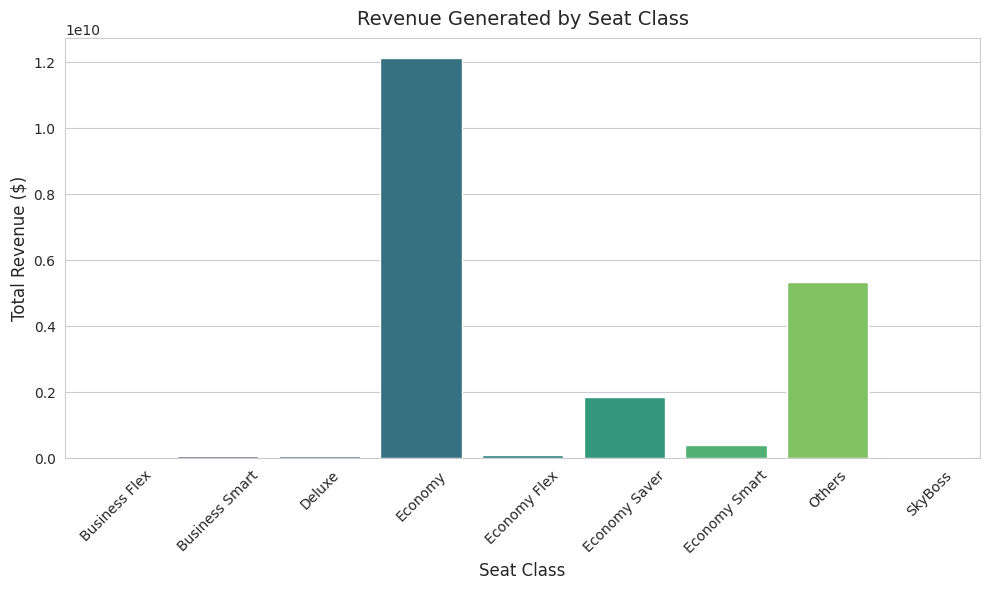

In [240]:
# Group by seat_class_simplified and sum revenue
revenue_by_seat_class = df.groupby('seat_class_simplified')['revenue'].sum().reset_index()

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=revenue_by_seat_class,
    x='seat_class_simplified',
    y='revenue',
    hue='seat_class_simplified',
    palette='viridis',
    legend=False
)

# Customize the plot
plt.title('Revenue Generated by Seat Class', fontsize=14, pad=10)
plt.xlabel('Seat Class', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('revenue_by_seat_class.png', dpi=300, bbox_inches='tight')

##### From the chart we can see that "Economy" is doing very well, because it's an affordable options to most people. "Others", which I assume to be "Economy" as well has the same advantage over other options.

##### Additionally , we can see that "Economy Saver" and "Economy Smart" have the potential to increase our revenue. However, we may want to see if they are specific to any age group so we can design our marketing campaign more approriate

In [241]:
seat_class_ranking = {
    'SkyBoss': 8,
    'Business Flex': 7,
    'Business Smart': 6,
    'Deluxe': 5,
    'Economy Flex': 4,
    'Economy Smart': 3,
    'Economy': 1,
    'Economy Saver': 2,
    'Others': 0
}

# Apply ordinal encoding
df['seat_class_encoded'] = df['seat_class_simplified'].map(seat_class_ranking)

In [242]:
if len(df[['passenger_age', 'seat_class_encoded']].dropna()) > 1:
    correlation, p_value = spearmanr(df['passenger_age'], df['seat_class_encoded'])
    print(f"\nSpearman Correlation between passenger_age and seat_class_encoded: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")
    print("\nInterpretation:")
    if p_value < 0.05:
        print("The correlation is statistically significant (p < 0.05).")
        if correlation > 0:
            print("Positive correlation: Older passengers tend to choose higher-ranked seat classes.")
        elif correlation < 0:
            print("Negative correlation: Younger passengers tend to choose higher-ranked seat classes.")
        else:
            print("No clear monotonic relationship.")
    else:
        print("The correlation is not statistically significant (p >= 0.05).")
else:
    print("\nNot enough data to compute correlation (need at least 2 valid rows).")


Spearman Correlation between passenger_age and seat_class_encoded: -0.012
P-value: 0.109

Interpretation:
The correlation is not statistically significant (p >= 0.05).


##### The reason I chose Spearmanr Correlation is because it tests the hypothesis based on the ordinal level of our data (seat_class has a hierarchy to it). If the output is >= 0.05, we accept the null hypothesis that the effect doesn't exist. If < 0.05, we reject the null hypothesis and confirm that the effect (or correlation) exists

##### In conclusion, there's no correlation between age and seat choice while testing the hypothesis using Spearmanr Correlation. Therefore, it's safe to assume we can focus more on the benefits of "Economy Smart" and "Economy Saver" offered to customers (For example: Discount, royalty program, ...) and convert Economy users to the above group

### 2. Age group

Mean Age: 30.2
Median Age: 28.0
Difference (Mean - Median): 2.2

Interpretation:
Positive difference: The distribution is likely right-skewed (e.g., a few very old passengers).


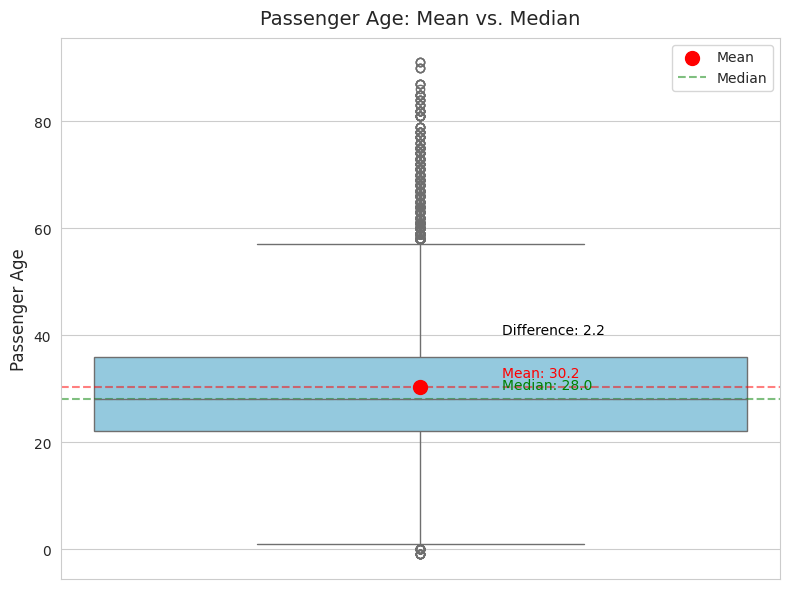

In [250]:
# Step 2: Calculate mean, median, and difference
mean_age = df['passenger_age'].mean()
median_age = df['passenger_age'].median()
difference = mean_age - median_age

# Print statistics
print(f"Mean Age: {mean_age:.1f}")
print(f"Median Age: {median_age:.1f}")
print(f"Difference (Mean - Median): {difference:.1f}")
print("\nInterpretation:")
if difference > 0:
    print("Positive difference: The distribution is likely right-skewed (e.g., a few very old passengers).")
elif difference < 0:
    print("Negative difference: The distribution is likely left-skewed (e.g., a few very young passengers).")
else:
    print("Zero difference: The distribution is likely symmetric.")

# Step 3: Create box plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Box plot for passenger_age
sns.boxplot(
    y=df['passenger_age'],
    color='skyblue'
)

# Add mean as a point
plt.scatter(x=0, y=mean_age, color='red', s=100, label='Mean', zorder=5)
plt.axhline(mean_age, color='red', linestyle='--', alpha=0.5)

# Add median annotation (median is already shown in the box plot)
plt.axhline(median_age, color='green', linestyle='--', alpha=0.5, label='Median')

# Annotate mean, median, and difference
plt.text(0.1, mean_age + 2, f'Mean: {mean_age:.1f}', color='red', fontsize=10)
plt.text(0.1, median_age + 2, f'Median: {median_age:.1f}', color='green', fontsize=10)
plt.text(0.1, max(mean_age, median_age) + 10, f'Difference: {difference:.1f}', color='black', fontsize=10)

# Customize the plot
plt.title('Passenger Age: Mean vs. Median', fontsize=14, pad=10)
plt.ylabel('Passenger Age', fontsize=12)
plt.xticks([])  # Remove x-axis ticks (single box)
plt.yticks(fontsize=10)
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('age_mean_median_difference.png', dpi=300, bbox_inches='tight')

##### Mean and Median are pretty close, so we know that either is suitable to represent the whole population. What we are trying to figure out here is to know which age group fly more frequently then the others. 

##### From the chart above, we can also see that there's a lot of potential to develop our marketing campaign to focus on the group 40 - 60 and above 60. We will likely need to explore the reason why we don't see much people from the above age range fly more frequently than the others, and what is a major motivation that can get them to fly more frequently? For examples:
##### - People from those age groups are not familiar with online booking?
##### - People from those age groups tend to save money instead of spending on vacation?
##### - People from those age groups don't see a reason to fly? 

##### As a business we can deep dive into these painpoints and explore different solutions